# Advance Linear Regression

## House Price Prediction Assignment

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

 

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

1) Which variables are significant in predicting the price of a house

2) How well those variables describe the price of a house?

3) Determine the optimal value oflambda for ridge and lasso regression

## Business Objective

We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market

### Step-1 : Data Understanding,Cleaning and EDA

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score,mean_squared_error


In [2]:
#Importing data
df=pd.read_csv('train.csv')

In [3]:
#Looking at the data 
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Looking at the structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#looking at the descriptive statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
#Setting display row and columns properties to max to make complete data visible
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [7]:
#Checking the percentage for Missing data
df.isnull().sum()/df.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

As we can see that there are certin columns that are having more than 40% of values as missing , therefore dropping those columns as they wont be useful. Also, dropping ID columns as its just an identifier

In [8]:
df=df.drop(columns=['MiscFeature','Fence','PoolQC','FireplaceQu','Alley','Id'],axis=1)

As per the data dictionary , there are columns that have __NA__ as one of their category type. Hence replacing NA values with the string _NA_

In [9]:
df[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual',
    'GarageCond']]=df[['MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual',
    'GarageCond']].replace(np.NAN,'NA')

In [10]:
#Looking at the Missing Data Again
df.isnull().sum()/df.shape[0]*100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
H

Replacing NAN values in __MasVnrArea__ and __LotFrontage__ with median as they are numerical values. Similarly, replacing __GarageYrBlt__ and __Electrical__ with mode as they are categorical feature

In [11]:
#Filling missing values with their corresponding metric
df['MasVnrArea']=df[['MasVnrArea']].fillna(df['MasVnrArea'].median())
df['LotFrontage']=df[['LotFrontage']].fillna(df['LotFrontage'].median())
df['GarageYrBlt']=df[['GarageYrBlt']].fillna(df['GarageYrBlt'].mode()[0])
df['Electrical']=df[['Electrical']].fillna(df['Electrical'].mode()[0])

In [12]:
# Makeing sure there are no missing values now
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

## EDA

In [13]:
# Getting all numerical and categorcial data in sepearate dataframes
categorical_columns=df.select_dtypes(include='object')
numerical_columns=df.select_dtypes(include=['int64','float64'])

# Moving a few features from numerical to categorcial dataframes
columns_to_categorical=numerical_columns[['MSSubClass','OverallQual','OverallCond']]
categorical_columns=pd.concat([categorical_columns,columns_to_categorical],axis=1)

#Dropping the moved feature from numerical df
numerical_columns=numerical_columns.drop(columns_to_categorical,axis=1)

In [14]:
numerical_columns.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


<Axes: >

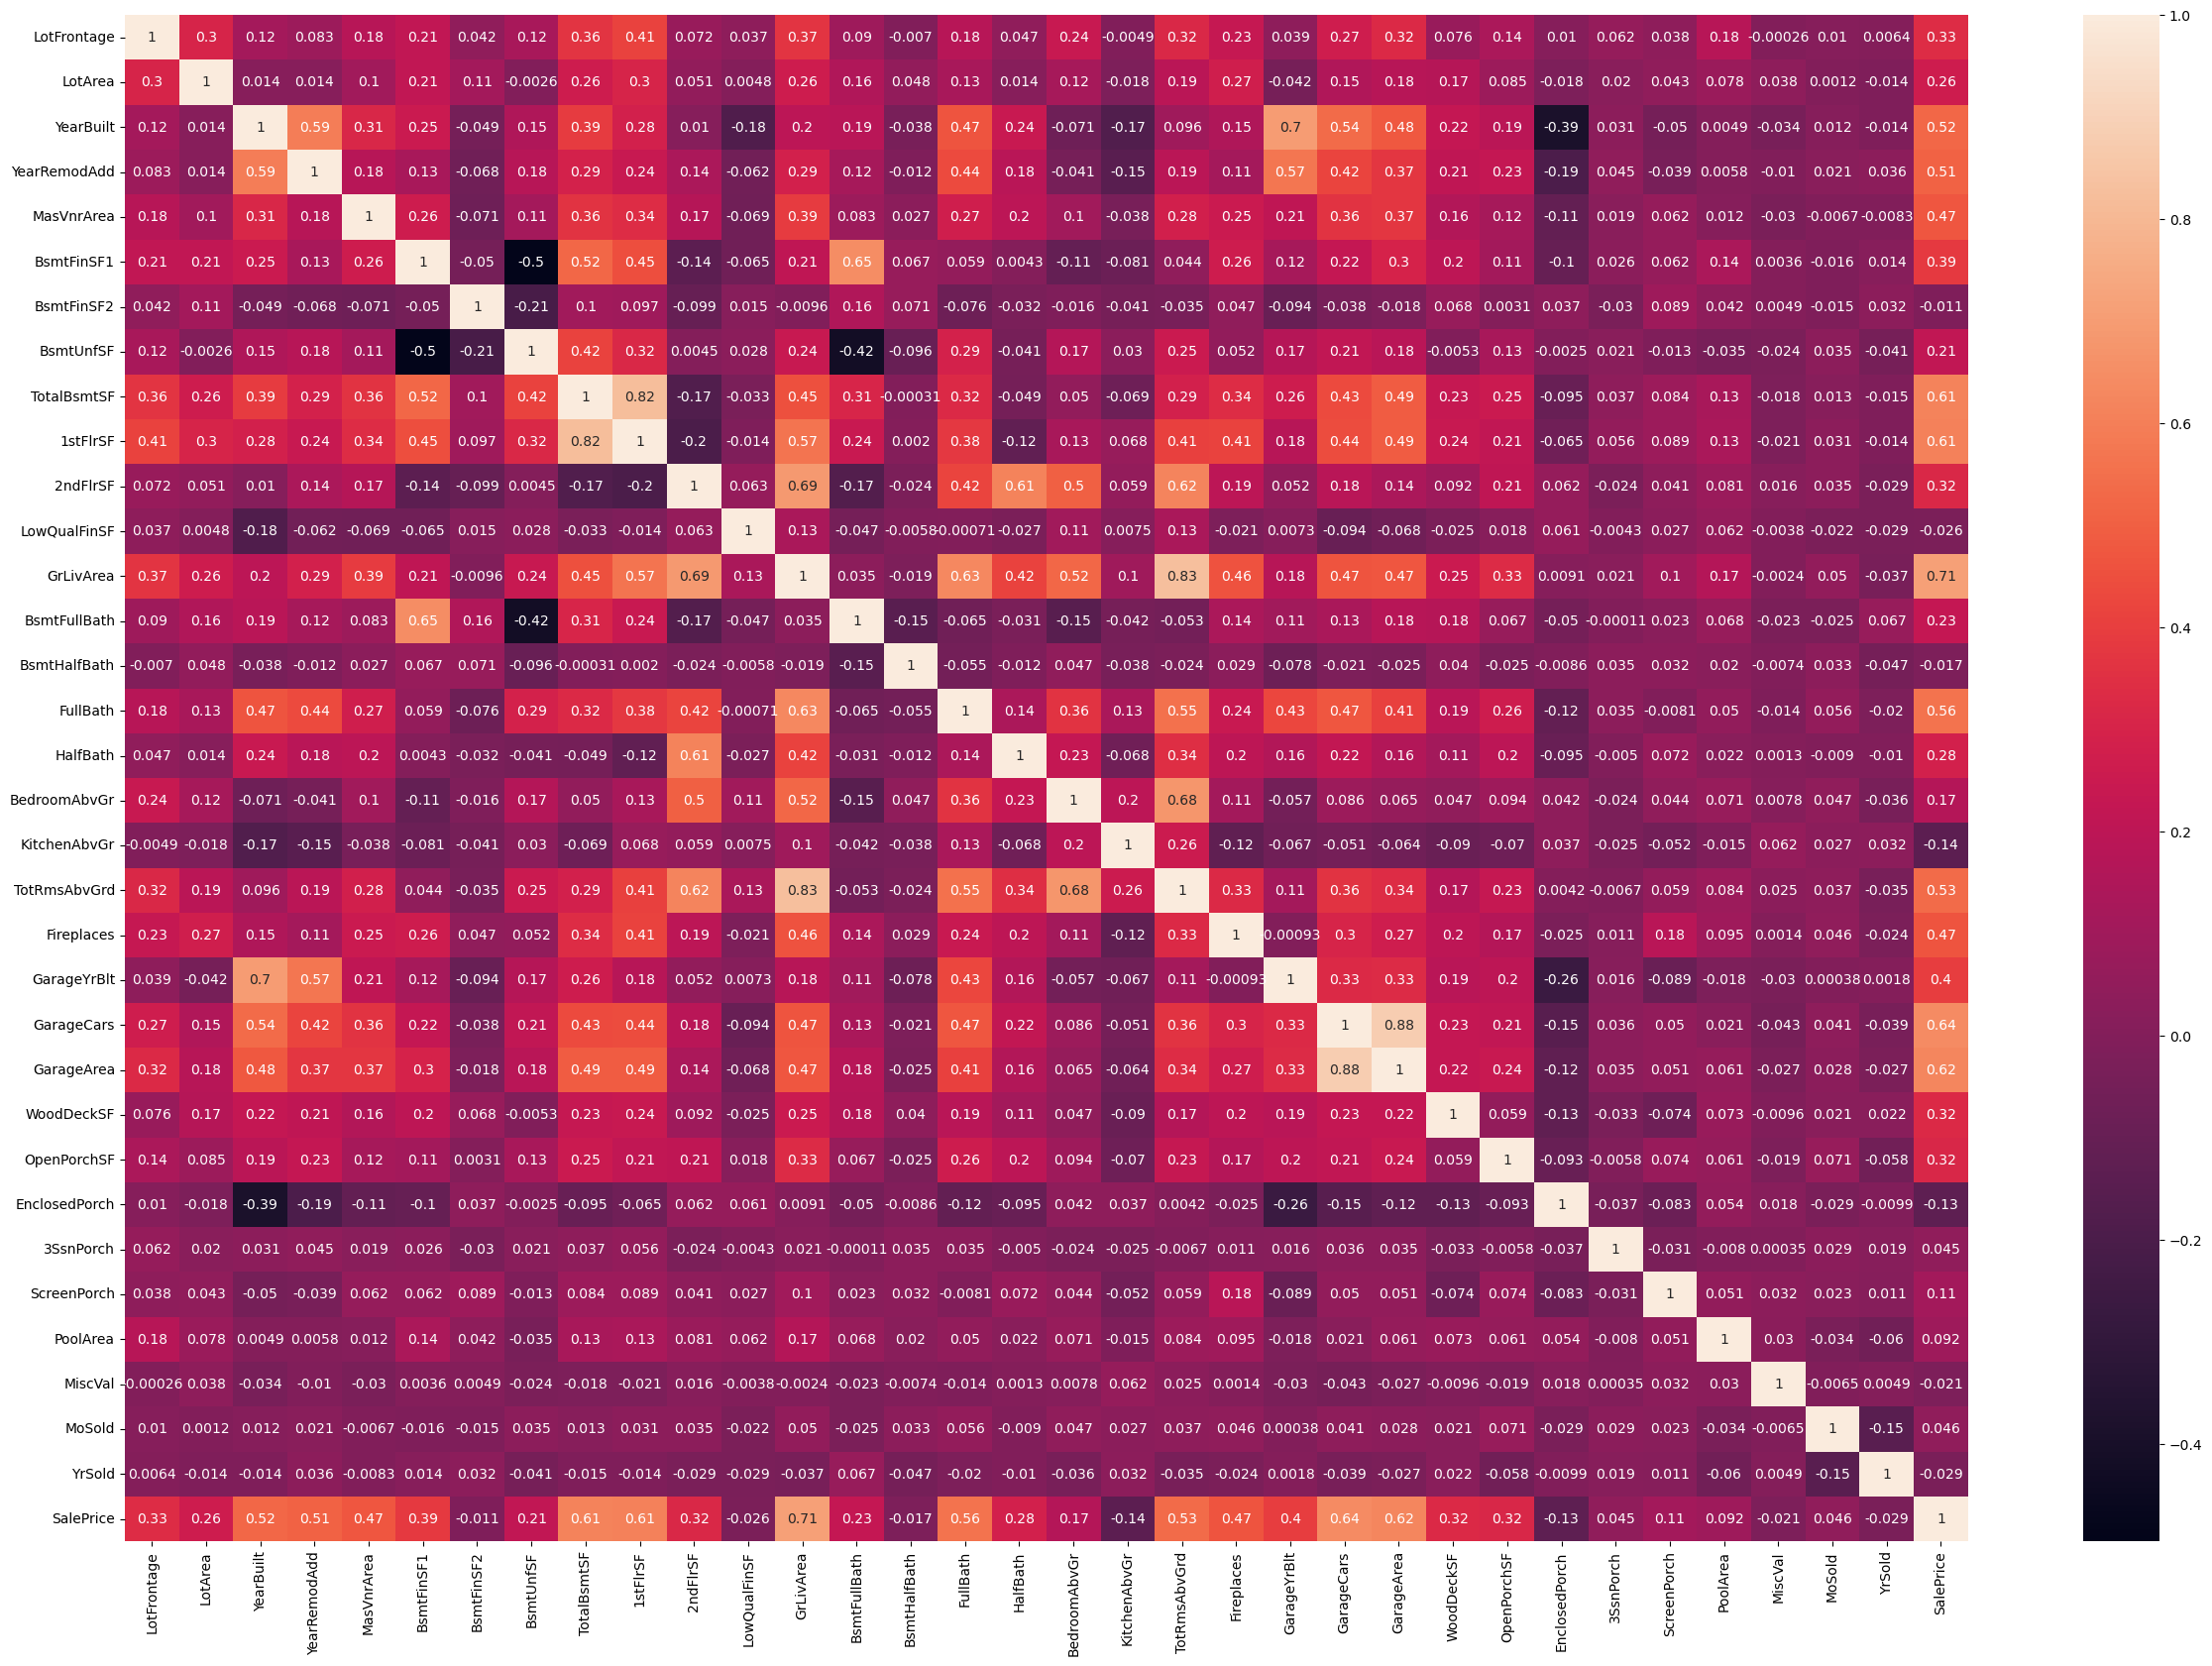

In [15]:
#Plotting heatmap for numerical data
plt.figure(figsize=(30,20))
sns.heatmap(numerical_columns.corr(),annot=True)

We can see that there are certain columns that are highly correlated to each other. We can drop one of these pairs.

Columns Being: __GarageCars,BsmtUnfSF,TotRmsAbvGrd__ and __GarageYrBlt__


In [16]:
numerical_columns=numerical_columns.drop(['GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt'],axis=1)

#### Outliers Detection 

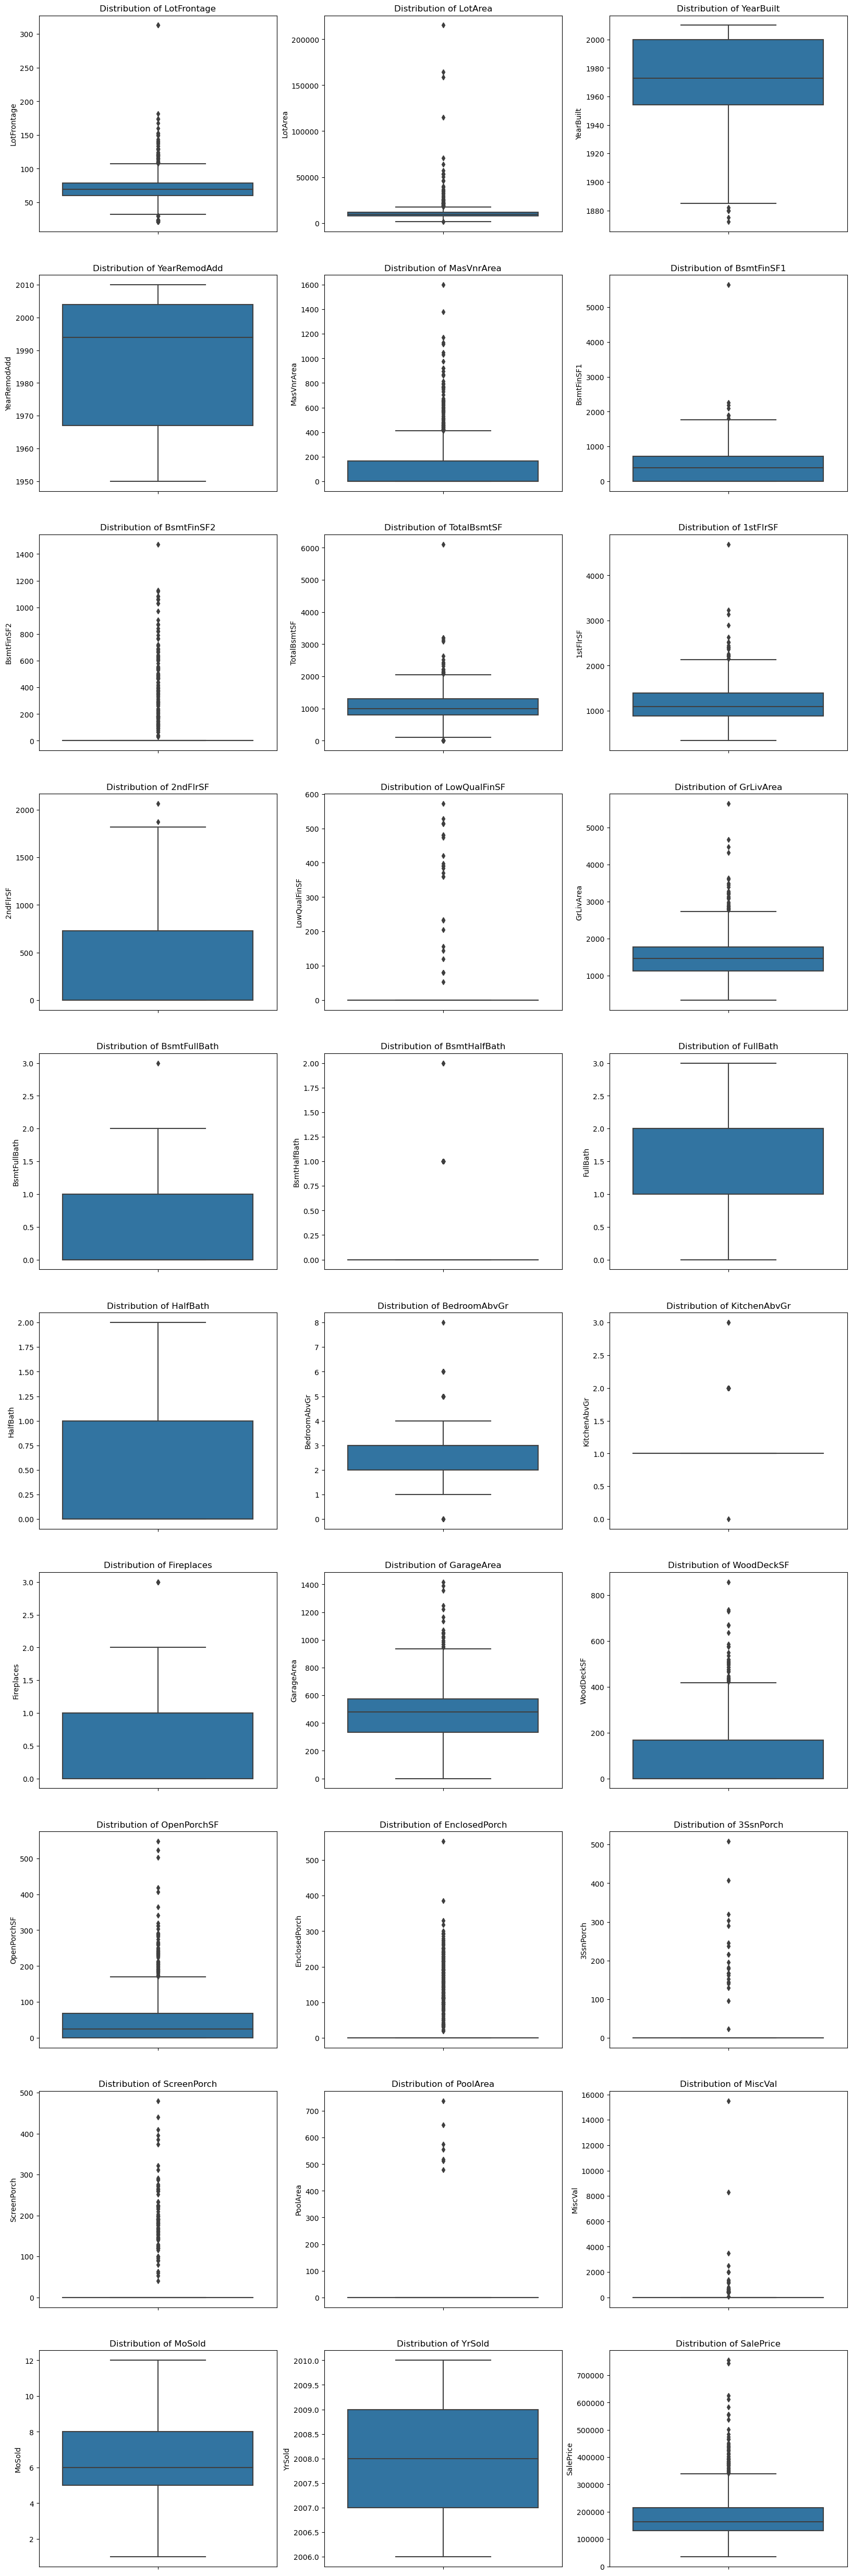

In [17]:
#Plotting box plots to get to know about ouliers
cols=3
x=numerical_columns.shape[1]
rows=int(x/cols)+1
count=1

plt.figure(figsize=(20,70))
for i in list(numerical_columns.columns):
    plt.subplot(rows,cols,count)
    sns.boxplot(y=numerical_columns[i])
    plt.xlabel('')
    plt.ylabel(i)
    plt.title('Distribution of '+i)
    count=count+1

Since the dataset is very small we will try to avoid dropping records and instead will standardize them later to mitigate the effect of ouliers

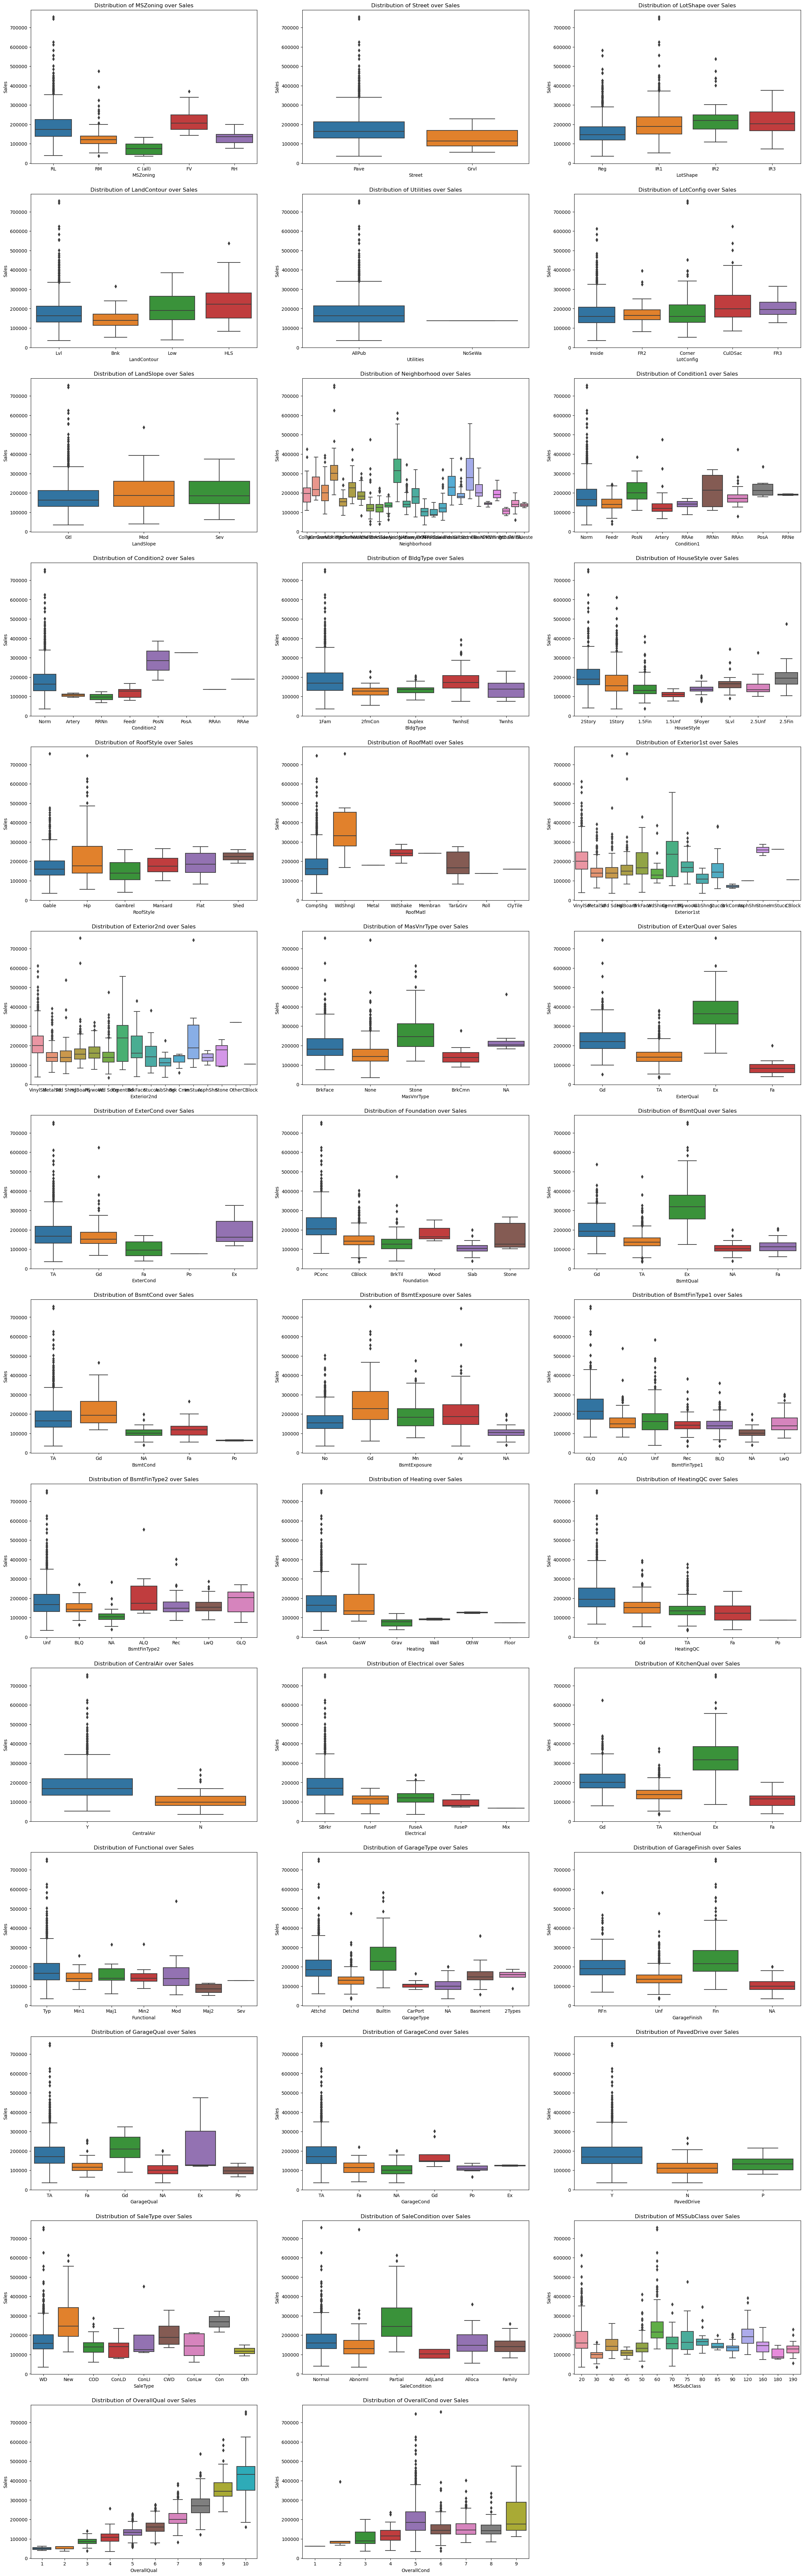

In [18]:
#Categorical Columns
cols=3
x=categorical_columns.shape[1]
rows=int(x/cols)+1
count=1

plt.figure(figsize=(30,100))
for i in list(categorical_columns.columns):
    plt.subplot(rows,cols,count)
    sns.boxplot(y=numerical_columns['SalePrice'],x=categorical_columns[i])
    plt.xlabel(i)
    plt.ylabel('Sales')
    plt.title('Distribution of '+i+' over Sales')
    count=count+1


We can make following obeservation from the plots above: 

1) Sales price increases with the increase in overall quality of house.
2) Mean sales price increases if the house has central air.
3) If Kitchen,Basement and External qual is excellent , then the sales price increases.

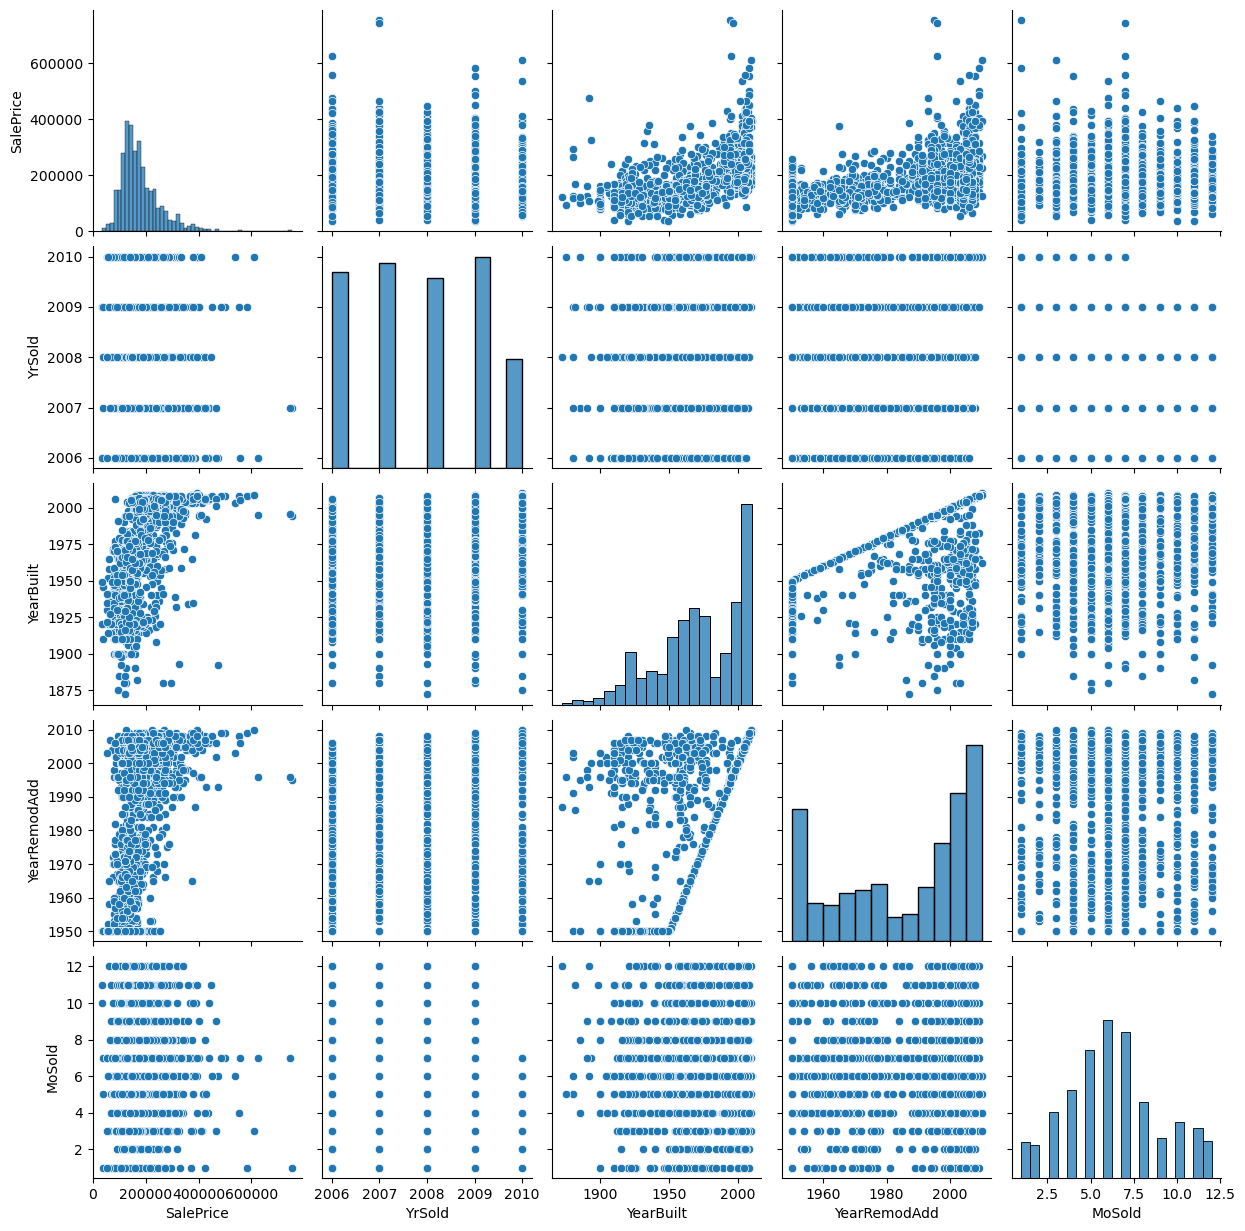

In [19]:
#Plotting pairplots between various date and time columns with sales
sns.pairplot(data=numerical_columns[['SalePrice','YrSold','YearBuilt','YearRemodAdd','MoSold']])


From the above plot we observe that only the __YearBuilt__ is slightly releated to sales. Rest exhibit no relationship with sales column. Hence they can be dropped

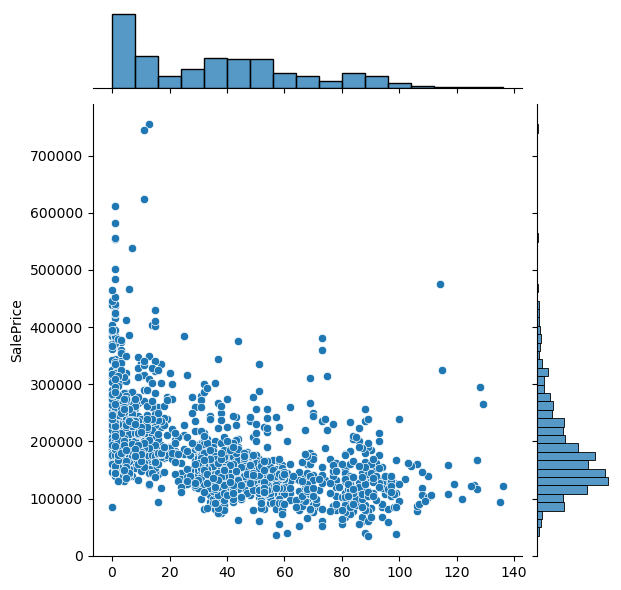

In [20]:
# Plotting to see relationship bewteen Age of property and sales columns
sns.jointplot(y=numerical_columns['SalePrice'],x=numerical_columns['YrSold']-numerical_columns['YearBuilt'])

From the above plot , we can create a derived metric called Age of Property and remove all other date and time columns

In [21]:
numerical_columns['AOP']=numerical_columns['YrSold']-numerical_columns['YearBuilt']

numerical_columns.drop(['YrSold','YearBuilt','YearRemodAdd','MoSold'],axis=1,inplace=True)

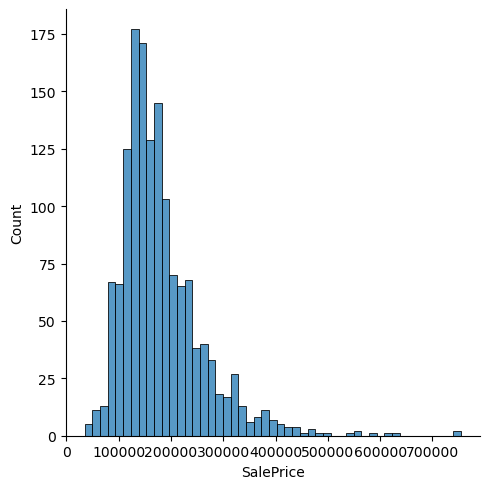

In [22]:
sns.displot(df['SalePrice'])


Since the distribution of target variable is right skewed. We will apply log transformation

In [23]:
df['SalePrice']=np.log1p(df['SalePrice'])

In [24]:
#drop street because of high imbalance
categorical_columns=categorical_columns.drop('Street',axis=1)

In [25]:
# Replacing values in binary categorical variables with 0s and 1s
categorical_columns[['CentralAir']]=categorical_columns[['CentralAir']].apply(lambda x:x.map({"N":0,"Y":1}))

In [26]:
# Concating the numerical and categorical clumns into one data frame for doing further analysis
df=pd.concat([categorical_columns,numerical_columns],axis=1)

## 2. Data Preparation 

##### Creating dummy variable for categorical variables

In [27]:
# Dummy variables for basement variables. 

df_Bsnmt=pd.get_dummies(df['BsmtQual'],prefix='BsmtQual')
df=pd.concat([df,df_Bsnmt],axis=1)

df_BsmtCond=pd.get_dummies(df['BsmtCond'],prefix='BsmtCond')
df_BsmtCond=df_BsmtCond.drop(['BsmtCond_NA'],axis=1)
df=pd.concat([df,df_BsmtCond],axis=1)

df_BsmtExposure=pd.get_dummies(df['BsmtExposure'],prefix='BsmtExposure')
df_BsmtExposure=df_BsmtExposure.drop(['BsmtExposure_NA'],axis=1)
df=pd.concat([df,df_BsmtExposure],axis=1)

df_BsmtFinType1=pd.get_dummies(df['BsmtFinType1'],prefix='BsmtFinType1')
df_BsmtFinType1=df_BsmtFinType1.drop(['BsmtFinType1_NA'],axis=1)
df=pd.concat([df,df_BsmtFinType1],axis=1)

df_BsmtFinType2=pd.get_dummies(df['BsmtFinType2'],prefix='BsmtFinType2')
df_BsmtFinType2=df_BsmtFinType2.drop(['BsmtFinType2_NA'],axis=1)
df=pd.concat([df,df_BsmtFinType2],axis=1)


Reason to drop all the NA values instead of first dummy variable is because all the above columns have same number of NA values as compared to __BsmtQual__. Hence, any one out of the above variable having NA will do the job.

Garage Columns follow the similar trend

In [28]:
df_GarageType=pd.get_dummies(df['GarageType'],prefix='GarageType')
df=pd.concat([df,df_GarageType],axis=1)

df_GarageFinish=pd.get_dummies(df['GarageFinish'],prefix='GarageFinish')
df_GarageFinish=df_GarageFinish.drop(['GarageFinish_NA'],axis=1)
df=pd.concat([df,df_GarageFinish],axis=1)

df_GarageQual=pd.get_dummies(df['GarageQual'],prefix='GarageQual')
df_GarageQual=df_GarageQual.drop(['GarageQual_NA'],axis=1)
df=pd.concat([df,df_GarageQual],axis=1)

df_GarageCond=pd.get_dummies(df['GarageCond'],prefix='GarageCond')
df_GarageCond=df_GarageCond.drop(['GarageCond_NA'],axis=1)
df=pd.concat([df,df_GarageCond],axis=1)

In [29]:
#Creating dummy variables for rest of the categorical features
for i in categorical_columns.columns:
    df_dummy=pd.get_dummies(df[i],prefix=i)
    df=pd.concat([df,df_dummy],axis=1)
df.drop(categorical_columns.columns,axis=1,inplace=True)

__Splitting the data into training and testing dataframes__

In [30]:
df_train,df_test=train_test_split(df,train_size=0.7,random_state=42)

print(df.shape)
print(df_train.shape)
print(df_test.shape)




(1460, 348)
(1021, 348)
(439, 348)


#### Standardising the numerical data 

In [31]:
scaler=StandardScaler()
df_train[numerical_columns.columns]=scaler.fit_transform(df_train[numerical_columns.columns])
df_train.head()


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AOP,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,H

In [32]:
#Assigning X_train and y_train
y_train=df_train.pop('SalePrice')
X_train=df_train

## Model Building

### 3.1 Linear Regression
Building Linear Rgression Model

In [33]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)



25661687486.33052
[ 1.63276338e-02  8.25316093e-02  2.39523869e-02  8.17957434e-02
  2.08712435e-02  1.04898431e-01 -1.69117816e+11 -1.91610243e+11
 -2.08341418e+10  2.30700145e+11  2.96955109e-02  1.96838379e-03
  3.54690552e-02  1.30443573e-02 -1.13677979e-02 -2.03247070e-02
  3.50723267e-02  9.08813477e-02  1.62487030e-02 -1.71279907e-03
  5.33294678e-03  2.43530273e-02  2.61650085e-02  4.04815674e-02
 -1.11503601e-02 -1.56044006e-01 -1.10429806e+10 -6.87042537e+09
  4.53927121e+09 -4.86101363e+10 -1.13021664e+09  4.19482613e+09
 -7.16555814e+09 -5.17776998e+09  2.31832018e+10 -1.20119994e+11
 -9.25075255e+10 -1.16307693e+11 -9.69468826e+10 -1.08862120e+10
 -3.82680577e+09  2.97414247e+10 -1.94562668e+09 -1.12899635e+10
  2.02362853e+10 -1.46149636e+10 -8.32975590e+09 -1.65692041e+10
  1.14580630e+09  1.67464790e+09 -1.31352796e+10  5.80504937e+10
  2.24814562e+10  5.85036190e+10  5.12109914e+10  6.32505390e+10
  7.49015381e+10  4.96986420e+10  3.92896877e+10  4.80796587e+10
  1.876

In [34]:
df_test[numerical_columns.columns] = scaler.transform(df_test[numerical_columns.columns])

y_test = df_test.pop('SalePrice')
X_test = df_test

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [35]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.939863859260625
-4.098823403730471e+19
61.398999694901875
2.079505868068834e+22
0.060136140739374996
4.73691541701329e+19


### 3.2 Ridge Regression
Building Ridge Regression Model

In [36]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error',
cv = folds, return_train_score=True,verbose = 1)


model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [37]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [38]:
#Fitting Ridge model for alpha = 2.0 and printing coefficients which have been penalised
alpha = 20.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

[-4.13748155e-02  5.02582851e-02  2.00290129e-02 -3.03572631e-02
  9.76525975e-03  1.37920338e-03  8.38653904e-02  1.73959542e-01
  7.60301028e-03  2.06649042e-01  5.46810948e-02  9.26518801e-04
  7.96222162e-02  3.69222768e-02  2.99267551e-03 -4.24780648e-02
  6.17264037e-02  8.23810293e-02  2.10867151e-02 -2.05939767e-02
  8.60355896e-03  2.38920145e-02  4.43860197e-02  4.63797628e-03
 -1.01084494e-02 -9.64442541e-02  1.54263265e-01 -2.34705897e-02
 -3.89458517e-02 -3.53913124e-02 -5.64555112e-02 -1.46381732e-02
  1.61977565e-02 -1.94163174e-02  5.32480464e-02  3.91839340e-03
  9.71935328e-02 -1.90314118e-02 -4.66892020e-02  1.80850691e-02
  6.51201767e-03  5.32465801e-02 -1.76852241e-02  1.02013677e-02
 -3.49684979e-02  3.99336441e-02 -1.73889675e-02  2.34265646e-03
 -3.13068893e-03 -1.22528667e-02  2.58875349e-02 -4.10649405e-02
  2.66052245e-02  1.43261327e-02 -2.31607926e-03 -2.02769633e-02
  2.15826262e-02  1.14399965e-03  5.02197563e-03 -2.65769897e-03
 -3.50827631e-03  5.58689

In [39]:
metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8856793168451207
0.8751896871472934
116.72141750113178
63.321532158836426
0.11432068315487931
0.1442403921613586


__Best Model Accuracy for Ridge - Training Acc : 0.8856793168451207, Test Acc : 0.8751896871472934 , Best Alpha : 20.0__

### 3.3 Lasso Regression
Building Lasso Regression model

In [40]:
#lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, param_grid = params, 
scoring= 'neg_mean_absolute_error', 
cv = folds, 
return_train_score=True,
verbose = 1)

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)


{'alpha': 0.001}


In [42]:
#Fitting Ridge model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)
lasso.coef_




array([-2.29637551e-03,  4.95715330e-02,  1.51323954e-02,  5.19146229e-02,
        4.67525076e-03,  6.25783782e-02,  0.00000000e+00,  6.45008035e-02,
       -1.29516967e-02,  3.22880012e-01,  3.84624912e-02, -0.00000000e+00,
        4.82469725e-02,  1.68438069e-02, -8.56160814e-03, -3.20978911e-02,
        4.60388117e-02,  7.42874747e-02,  1.55625638e-02, -9.21705968e-03,
        4.17780404e-03,  2.09110567e-02,  3.31313663e-02,  2.90611439e-02,
       -8.24448226e-03, -1.35615593e-01,  1.69418636e-01,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -4.41681302e-04, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  4.90951192e-02,  0.00000000e+00,
        1.83725922e-01, -3.33168451e-03, -6.23369972e-02,  0.00000000e+00,
       -0.00000000e+00,  3.78010425e-02, -6.91416551e-03,  0.00000000e+00,
       -0.00000000e+00,  1.09752224e-02, -3.41137531e-03,  0.00000000e+00,
       -5.32404247e-04, -0.00000000e+00,  6.08322274e-03, -1.07744711e-01,
        0.00000000e+00,  

In [43]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

In [44]:
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)





0.927428835424775
0.905486401136933
74.09515903130466
47.950732219683516
0.07257116457522493
0.10922718045485995


__Best Model Accuracy for Lasso - Training Acc : 0.927428835424775, Test Acc : 0.905486401136933 ,Best Alpha : 0.001__

### Creating Result Table 

In [45]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'], 
'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

X=pd.concat([X_train,X_test],axis=0)

#Coefficent
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns


betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [46]:
betas

,Linear,Ridge,Lasso
LotFrontage,1.632763e-02,-0.041375,-2.296376e-03
LotArea,8.253161e-02,0.050258,4.957153e-02
MasVnrArea,2.395239e-02,0.020029,1.513240e-02
BsmtFinSF1,8.179574e-02,-0.030357,5.191462e-02
BsmtFinSF2,2.087124e-02,0.009765,4.675251e-03
TotalBsmtSF,1.048984e-01,0.001379,6.257838e-02
1stFlrSF,-1.691178e+11,0.083865,0.000000e+00
2ndFlrSF,-1.916102e+11,0.173960,6.450080e-02
LowQualFinSF,-2.083414e+10,0.007603,-1.295170e-02
GrLivArea,2.307001e+11,0.206649,3.228800e-01


__Top 10 Variables coming from Lasso Regression__

In [47]:
betas["Lasso"].sort_values()[:5]

RoofMatl_ClyTile       -6.427699
Condition2_PosN        -2.402356
OverallCond_3          -0.231336
Neighborhood_Edwards   -0.146541
AOP                    -0.135616
Name: Lasso, dtype: float64

In [48]:
betas["Lasso"].sort_values()[-5:]

GrLivArea               0.322880
Neighborhood_NoRidge    0.359881
Neighborhood_StoneBr    0.427341
OverallQual_9           0.623743
OverallQual_10          1.246898
Name: Lasso, dtype: float64

__Top 10 Variables coming from Ridge Regression__

In [49]:
betas["Ridge"].sort_values()[:5]

Neighborhood_Edwards   -0.211313
RoofMatl_ClyTile       -0.196451
LandContour_Bnk        -0.159451
Condition2_PosN        -0.142543
OverallCond_3          -0.125318
Name: Ridge, dtype: float64

In [50]:
betas["Ridge"].sort_values()[-5:]

GrLivArea               0.206649
KitchenQual_Ex          0.212869
Neighborhood_StoneBr    0.225287
Neighborhood_NoRidge    0.262010
OverallQual_9           0.268890
Name: Ridge, dtype: float64

### Double Lasso and Ridge (Assignment Question) 

In [51]:
#Building Final Lasso Model with Alpha=0.002
alpha =0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Training r2_score : '+ str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test r2_score : '+ str(r2_test_lr))
metric3.append(r2_test_lr)


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Training RSS : '+ str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test RSS : '+str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Training MSE : '+str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE : '+str(mse_test_lr))
metric3.append(mse_test_lr**0.5)


Training r2_score : 0.9129867336529865
Test r2_score : 0.8984483482941787
Training RSS : 88.84054494030075
Test RSS : 51.521433063483144
Training MSE : 0.08701326634701347
Test MSE : 0.11736089536100944


In [52]:
#Building final ridge model with alpha = 40.0

alpha = 40.0
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Training r2_score : ' + str(r2_train_lr))
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Training r2_score : ' + str(r2_test_lr))
metric2.append(r2_test_lr)


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Training RSS : '+ str(rss1_lr))
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test RSS : '+str(rss2_lr))
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Training MSE : '+str(mse_train_lr))
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE : '+str(mse_test_lr))
metric2.append(mse_test_lr**0.5)


Training r2_score : 0.8729678958729985
Training r2_score : 0.8709114845537725
Training RSS : 129.69977831366856
Test RSS : 65.49204465027896
Training MSE : 0.12703210412700153
Test MSE : 0.14918461195963315


In [53]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'], 
'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

X=pd.concat([X_train,X_test],axis=0)

#Coefficent
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns


betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [54]:
betas['Ridge'].sort_values()[:5]

Neighborhood_Edwards   -0.170775
LandContour_Bnk        -0.121371
KitchenQual_TA         -0.113190
RoofMatl_ClyTile       -0.109072
OverallQual_6          -0.100172
Name: Ridge, dtype: float64

In [55]:
betas['Ridge'].sort_values()[-5:]

2ndFlrSF                0.157890
Neighborhood_NoRidge    0.179142
KitchenQual_Ex          0.193069
GrLivArea               0.196246
OverallQual_9           0.201055
Name: Ridge, dtype: float64

In [56]:
betas['Lasso'].sort_values()[-5:]

GrLivArea               0.329891
Neighborhood_NoRidge    0.384527
Neighborhood_StoneBr    0.388688
OverallQual_9           0.585400
OverallQual_10          0.896411
Name: Lasso, dtype: float64

In [57]:
betas['Lasso'].sort_values()[:5]

RoofMatl_ClyTile       -4.453120
Condition2_PosN        -1.400032
OverallCond_3          -0.178567
Neighborhood_Edwards   -0.154547
AOP                    -0.117755
Name: Lasso, dtype: float64

### Lasso Without top 5 feature 

In [58]:
X_train=X_train.drop(columns=['OverallQual_10','RoofMatl_ClyTile','OverallQual_9','Neighborhood_NoRidge','Neighborhood_StoneBr'],axis=1)
X_test=X_test.drop(columns=['OverallQual_10','RoofMatl_ClyTile','OverallQual_9','Neighborhood_NoRidge','Neighborhood_StoneBr'],axis=1)

In [59]:
#lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, param_grid = params, 
scoring= 'neg_mean_absolute_error', 
cv = folds, 
return_train_score=True,
verbose = 1)

model_cv.fit(X_train, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.001}


In [60]:
#Building Lasso Model without top 5 feature
alpha =0.001
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)


metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('Training r2_score : '+ str(r2_train_lr))
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('Test r2_score : '+ str(r2_test_lr))
metric3.append(r2_test_lr)


rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Training RSS : '+ str(rss1_lr))
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Test RSS : '+str(rss2_lr))
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Training MSE : '+str(mse_train_lr))
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Test MSE : '+str(mse_test_lr))
metric3.append(mse_test_lr**0.5)


Training r2_score : 0.8911303515998912
Test r2_score : 0.8743284870845389
Training RSS : 111.15591101651104
Test RSS : 63.758455248142816
Training MSE : 0.10886964840010875
Test MSE : 0.14523566115750072


In [61]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'], 
'Linear Regression': metric}

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

X=pd.concat([X_train,X_test],axis=0)

#Coefficent
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns



betas['Lasso'] = lasso.coef_

In [62]:
betas['Lasso'].sort_values()[:5]

Condition2_PosN   -1.506857
OverallQual_3     -0.509942
OverallQual_5     -0.456493
OverallQual_4     -0.455867
OverallQual_6     -0.440131
Name: Lasso, dtype: float64

In [63]:
betas['Lasso'].sort_values()[-5:]

Exterior1st_BrkFace    0.240298
KitchenQual_Ex         0.318224
GrLivArea              0.326141
RoofMatl_WdShngl       0.508949
Exterior2nd_ImStucc    0.509891
Name: Lasso, dtype: float64